# Data analysis del Conjunto de Datos

En este `notebook`  se va a analizar el dataset, teniendo en cuenta cuántas samples hay en cada subconjunto (entrenamiento y test) el balanceo de las clases y la muestra de dos samples de cada clase para ver cómo son los datos que estamos procesando.

In [ ]:
!pip install h5py
!pip install matplotlib
!pip install pandas

%matplotlib inline

## Conjunto de entrenamiento
Empezamos leyendo el conjunto de datos. Estos se encuentran en un fichero con extensión .h5, por tanto usamos la biblioteca h5py para poder leerlo y parsearlo dentro de nuestro script de Python.

In [2]:
import h5py
import numpy as np
import pandas as pd

path = "../data/Train_EnergyGround_alt5200m_qgsii_fluka_N44971.h5"

with h5py.File(path, "r") as f:
    data = np.array(f["data"])
    info = pd.read_hdf(path, key="info")

Como se puede ver en la `code cell` de abajo, el conjunto de entrenamiento se compone de 44971 muestras y cada ena es una image de un único canal con unas dimensiones de 80x80.

In [3]:
data.shape

(44971, 80, 80)

Podemos ver, que la información guardada dentro de la key `info` contiene la clase a la que pertenece cada muestra (Y_class) junto con un identificador (ID_shower), la energía de la cascada (E0), el ángulo de incidencia del rayo (theta0) y el número de muones (Nmuons). De aquí, solo nos interesa la etiqueta, es decir, la columna Y_class.

In [4]:
info

,ID_shower,E0,theta0,Nmuons,Y_class
0,0.0,62743.449219,0.0,578.0,0.0
1,1.0,40416.339844,0.0,408.0,0.0
2,2.0,61331.218750,0.0,539.0,0.0
3,3.0,57133.789062,0.0,434.0,0.0
4,4.0,61603.351562,0.0,477.0,0.0
...,...,...,...,...,...
22485,22485.0,2572.270020,0.0,13.0,1.0
22486,22486.0,3828.409912,0.0,21.0,1.0
22487,22487.0,2528.129883,0.0,30.0,1.0
22488,22488.0,3443.100098,0.0,27.0,1.0


En la salida de la celda de abajo, podemos observar que hay dos clases. Cada clase representa lo siguiente:
- Clase 0: cascada generada por un átomo de hierro.
- Clase 1: cascada generada por un protón.

El otro número que aparece es el número de muestras que hay para cada clase y como se puede observar, están mas o menos balanceadas. Solo hay 9 muestras más de la clase 1.

In [5]:
labels = info.loc[:, "Y_class"].values
unique , counts = np.unique(labels, return_counts=True)
dict(zip(unique.astype(int), counts))

{0: 22481, 1: 22490}

## Conjunto de test o de pruebas
En la `code cell` de abajo podemos observar que el conjunto de tests o de pruebas se compone de 14989 muestras. Esto aproximadamente es el 25% del total de muestras si sumamos las del conjunto de entrenamiento y este.

In [6]:
test_path = "../data/Test_EnergyGround_alt5200m_qgsii_fluka_N14989.h5"

with h5py.File(test_path, "r") as f:
    data_test = np.array(f["data"])
    info_test = pd.read_hdf(test_path, key="info")

print(data_test.shape)

(14989, 80, 80)


Como podemos ver en la salida de abajo, de nuevo las clases están bastante balanceadas.

In [7]:
labels_test = info_test.loc[:, "Y_class"].values
unique_test, counts_test = np.unique(labels_test, return_counts=True)

dict(zip(unique.astype(int), counts_test))

{0: 7493, 1: 7496}

## Representación de dos muestras del conjunto de datos
En esta sección se va a escoger dos muestras de cada clase del conjunto de datos para ser representados.

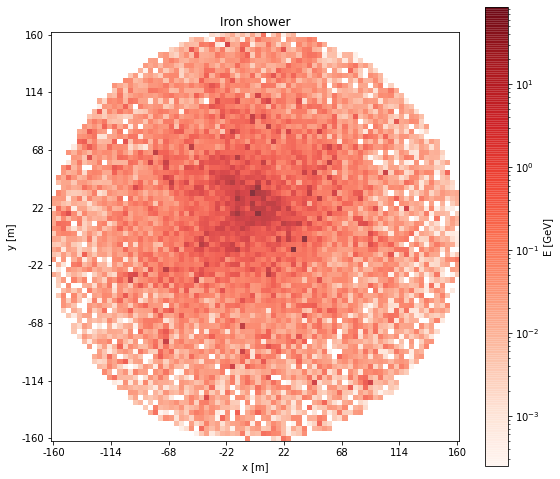

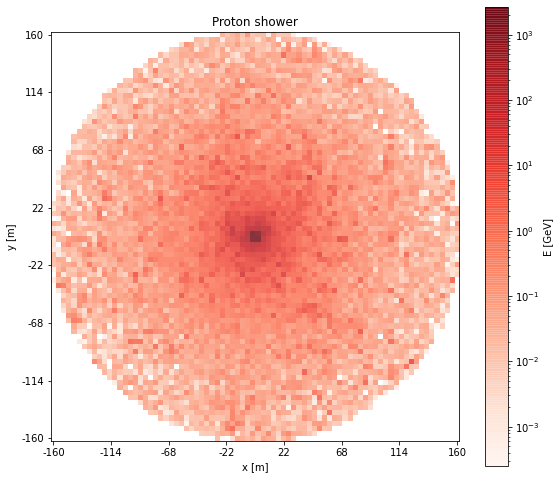

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

iron_index_train = np.where(labels==0)[0]
proton_index_train = np.where(labels==1)[0]

index_to_use = 1
label = "E [GeV]"

#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.imshow(data[iron_index_train[index_to_use],:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
plt.title("Iron shower")
plt.xlabel("x [m]")
plt.xticks(ticks = np.linspace(0,data.shape[1]-1,8), labels=np.linspace(-160,160,8).astype(int))
plt.ylabel('y [m]')
plt.yticks(ticks = np.linspace(0,data.shape[2]-1,8), labels=-1*np.linspace(-160,160,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()

index_to_use = 103
#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.imshow(data[proton_index_train[index_to_use],:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
plt.title("Proton shower")
plt.xlabel("x [m]")
plt.xticks(ticks = np.linspace(0,data.shape[1]-1,8), labels=np.linspace(-160,160,8).astype(int))
plt.ylabel('y [m]')
plt.yticks(ticks = np.linspace(0,data.shape[2]-1,8), labels=-1*np.linspace(-160,160,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()